In [11]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import cohen_kappa_score

ds = xr.open_dataset("../../NC/compare.nc") 

In [12]:
def get_dominant(ds, mode, names, time):
    stacks = []
    for name in names:
        var = f"{mode}_{name}"
        da = ds[var].sel(time=time)
        stacks.append(da)

    data = xr.concat(stacks, dim="class")

    data_filled = data.fillna(0)

    # 计算最大类别 index
    dominant_idx = data_filled.argmax(dim="class")

    # mask：如果所有值都是 0，则设为 NaN
    mask = data_filled.sum(dim="class") == 0
    dominant_idx = dominant_idx.where(~mask)

    return dominant_idx

In [ ]:

years = list(range(2010, 2101, 10))   # 2010,2020,...,2100
years.insert(0, 2005)
names = ["agri","forest","grassland"]

year = "2005"



In [ ]:
kappa_list=[]
accuracy_list=[]
for year in years:
    time =f"{year}-01-01"
    dominant_basin=get_dominant(ds,"basin",names,time)
    dominant_region=get_dominant(ds,"region",names,time)

    a = dominant_basin.values.flatten()
    b = dominant_region.values.flatten()

    # 去掉 NaN（必须）
    mask = ~np.isnan(a) & ~np.isnan(b)
    a_valid = a[mask].astype(int)
    b_valid = b[mask].astype(int)

    kappa = cohen_kappa_score(a_valid, b_valid)
    print(f"Kappa in {year} = {kappa:.3f}")
    kappa_list.append(kappa)

    overall_accuracy = np.mean(a_valid == b_valid)
    print(f"Overall accuracy in {year} = {overall_accuracy:.3f}")
    accuracy_list.append(overall_accuracy)

    

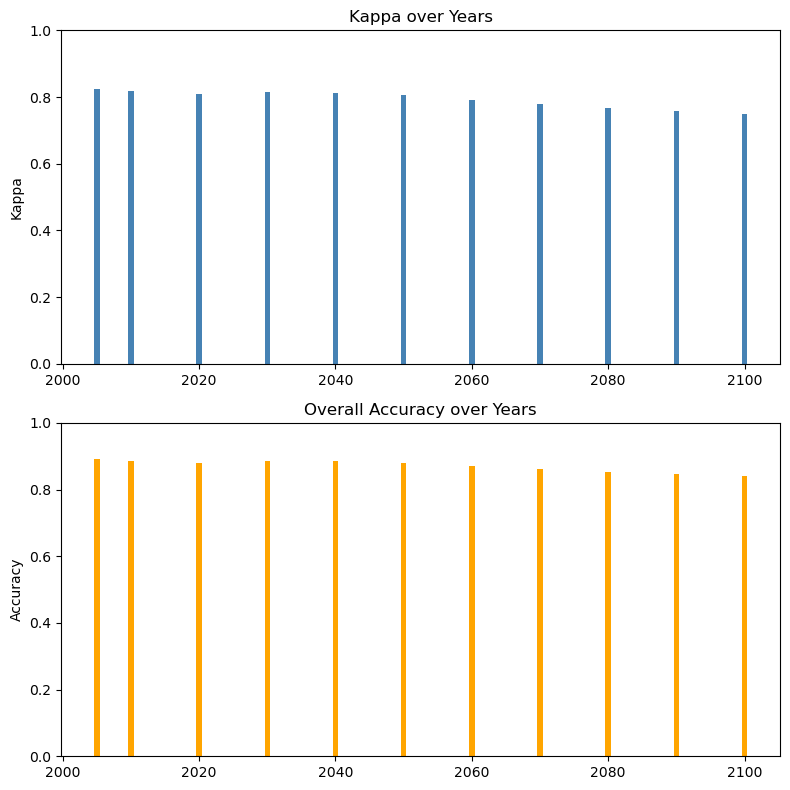

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(8,8))

# Kappa
axes[0].bar(years, kappa_list, color='steelblue')
axes[0].set_title("Kappa over Years")
axes[0].set_ylabel("Kappa")
axes[0].set_ylim(0,1)

# Accuracy
axes[1].bar(years, accuracy_list, color='orange')
axes[1].set_title("Overall Accuracy over Years")
axes[1].set_ylabel("Accuracy")
axes[1].set_ylim(0,1)

plt.tight_layout()
plt.show()